#Libraries

In [ ]:
!python --version

Python 3.8.10


In [ ]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import json
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

nltk.download('stopwords')
nltk.download('punkt')

!pip install unidecode
!pip install faker

import unidecode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Feature Extraction from Text - MX Dataset Original

## Load a dataset

In [ ]:
desc_csv = 'MX Dataset Original.csv'
df = pd.read_csv(desc_csv,  encoding='utf-8')
df.head(10)

,Nombre,etiqueta
0,Eric Montoya,1
1,Francisca Magaña,1
2,Javier Cabán,1
3,Luz Ilse Arce Alba,1
4,Cristian Isabela Molina Estévez,1
5,Claudia Mercedes Mayorga,1
6,Nelly Mateo Castro Benavides,1
7,Sessa Medrano,1
8,Gabriel María Cristina Ballesteros Rascón,1
9,Patricio de la Crúz,1


In [ ]:
X = df['Nombre'] 
y = df['etiqueta']
X.head(10)


0                                 Eric Montoya
1                             Francisca Magaña
2                                 Javier Cabán
3                           Luz Ilse Arce Alba
4              Cristian Isabela Molina Estévez
5                     Claudia Mercedes Mayorga
6                 Nelly Mateo Castro Benavides
7                                Sessa Medrano
8    Gabriel María Cristina Ballesteros Rascón
9                          Patricio de la Crúz
Name: Nombre, dtype: object

In [ ]:
stop_words = set(stopwords.words("spanish"))

def normalize_text(text_str):
        unaccented = unidecode.unidecode(text_str)
        unaccented = unaccented.replace("\n", ",")
        text_token = word_tokenize(unaccented)
        filtered_sentence = " ".join([w for w in text_token if not w.lower() in stop_words])
        # Remove Stop Words
        text_upper = filtered_sentence.upper().replace(".", "")
        return text_upper

for i,X_i in enumerate(X):
    unaccented = unidecode.unidecode(str(X_i))
    X[i] = normalize_text(unaccented)
    #print(X[i], len(X[i]))


<ipython-input-5-2a8904cf40be>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = normalize_text(unaccented)


In [ ]:
X

0                                            ERIC MONTOYA
1                                        FRANCISCA MAGANA
2                                            JAVIER CABAN
3                                      LUZ ILSE ARCE ALBA
4                         CRISTIAN ISABELA MOLINA ESTEVEZ
                              ...                        
2535                                                   20
2536    NOVIEMBRE 2014 , NUMERO REGISTRO PPAQ-S0025-00...
2537    ZURICH COMPANIA SEGUROS , SA , CORPORATIVO ANT...
2538                      COL GRANADA , DELEGACION MIGUEL
2539    HIDALGO , CP  11520 , MEXICO , DF  TEL  5284 1...
Name: Nombre, Length: 2540, dtype: object

##Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)



# Feature Extraction from Text - UK Dataset Balanceado 

## Load a dataset

In [ ]:
desc_csv = 'UK Dataset.csv'
df = pd.read_csv(desc_csv,  encoding='utf-8')
df.head(10)

,Nombre,etiqueta,count words,Alpha
0,TELLECHEA CORGNATI ESTEBAN,1,3,1
1,AÃ±o,0,1,0
2,"4,807.62",0,1,0
3,"3,000.00",0,1,0
4,César Eduardo Lozano,1,3,1
5,22,0,1,0
6,Rafaél Rivera,1,2,1
7,49411,0,1,0
8,SAAVEDRA LUCAS ARIEL,1,3,1
9,181690,0,1,0


In [ ]:
X = df['Nombre'] 
y = df['etiqueta']
X.head(10)


0    TELLECHEA CORGNATI ESTEBAN
1                          AÃ±o
2                      4,807.62
3                      3,000.00
4          César Eduardo Lozano
5                            22
6                 Rafaél Rivera
7                         49411
8          SAAVEDRA LUCAS ARIEL
9                        181690
Name: Nombre, dtype: object

In [ ]:
stop_words = set(stopwords.words("english"))

def normalize_text(text_str):
        unaccented = unidecode.unidecode(text_str)
        unaccented = unaccented.replace("\n", ",")
        text_token = word_tokenize(unaccented)
        filtered_sentence = " ".join([w for w in text_token if not w.lower() in stop_words])
        # Remove Stop Words
        text_upper = filtered_sentence.upper().replace(".", "")
        return text_upper

for i,X_i in enumerate(X):
    unaccented = unidecode.unidecode(str(X_i))
    X[i] = normalize_text(unaccented)
    #print(X[i], len(X[i]))


<ipython-input-46-79473c6e976d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = normalize_text(unaccented)


In [ ]:
z = df['count words']
w = df["Alpha"]



In [ ]:
X = pd.concat([X,z,w], axis=1)


##Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)



In [ ]:
X_train

,Nombre,count words,Alpha
4572,Emiliano Gil,2,1
3729,PUNTERI NICOLAS,2,1
356,BRIOZZOJ ORGE OSCAR LUIS,4,1
1162,269.10,1,0
3995,Nayeli Ofelia Tijerina Alonzo,4,1
...,...,...,...
3772,"14,334.34",1,0
5191,SARAVIA SCHMIDT JUAN MATIAS,4,1
5226,Irma Gurule,2,1
5390,GONZALEZ LUCIANA MARISOL,3,1


In [ ]:
A=TfidfVectorizer().fit(X_train,y_train)

# Train using a SCV and GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Train a SVM classification model
print("Fitting the classifier to the training set")
param_grid = {'C': [5e3, 1e4, 1e5], 'gamma': [0.01, 0.1],}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced',probability=True), param_grid)

text_clf_SVM = Pipeline([('tfidf', TfidfVectorizer()), ('clf', clf)])
# Feed the training data through the pipeline
text_clf_SVM.fit(X_train, y_train)


Fitting the classifier to the training set


ValueError: ignored

# Evaluation - MX Dataset Original

###Confusion Matrix

In [ ]:
preds = text_clf_SVM.predict(X_test)
cm=metrics.confusion_matrix(y_test,preds)


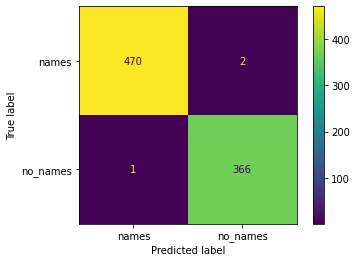

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f84fad5a8b0>,
 None)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

class_option= [ "names", "no_names"]
display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_option)
display.plot(), plt.show()

In [ ]:
desc_auto = 'HABERES JULIO 2022' # probamos un nombre cualquiera
res = text_clf_SVM.predict_proba([desc_auto])
print(res)
print(round(res[0][0], 5), round(res[0][1], 5))

[[0.01321482 0.98678518]]
0.01321 0.98679


In [ ]:
desc_auto_2 = 'AUDI A3 SEDAN AMBIENTE 1.8 S TRONIC AUT'
res2 = text_clf_SVM.predict_proba([desc_auto_2])
print(round(res2[0][0], 5), round(res2[0][1], 5))

1.0 0.0


###ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

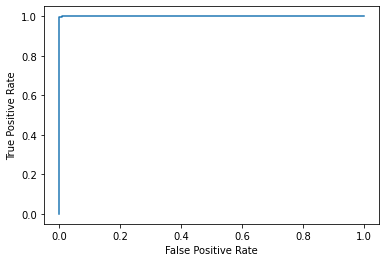

In [ ]:
y_score = text_clf_SVM.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y,text_clf_SVM.decision_function(X))
print(auc)

0.99999747999748


### Precision and Recall

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

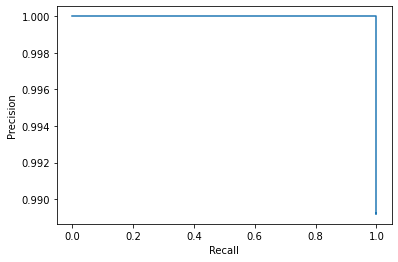

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

###Cross-validation

In [ ]:
a_ver=cross_val_score(text_clf_SVM,X,y,cv=5)
print (a_ver)
print(text_clf_SVM.score(X.values,y.values))

[0.99212598 0.99606299 0.9980315  0.98622047 0.99409449]
0.9988188976377953


# Evaluation - UK Dataset

###Confusion Matrix

In [ ]:
preds = text_clf_SVM.predict(X_test)
cm=metrics.confusion_matrix(y_test,preds)


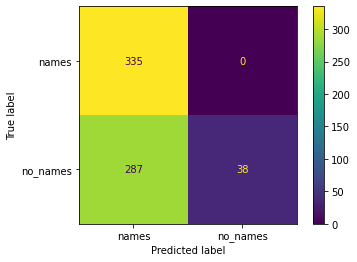

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f8530b5cbb0>,
 None)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

class_option= [ "names", "no_names"]
display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_option)
display.plot(), plt.show()

In [ ]:
desc_auto = 'HABERES JULIO 2022' # probamos un nombre cualquiera
res = text_clf_SVM.predict_proba([desc_auto])
print(res)
print(round(res[0][0], 5), round(res[0][1], 5))

[[0.01321482 0.98678518]]
0.01321 0.98679


In [ ]:
desc_auto_2 = 'AUDI A3 SEDAN AMBIENTE 1.8 S TRONIC AUT'
res2 = text_clf_SVM.predict_proba([desc_auto_2])
print(round(res2[0][0], 5), round(res2[0][1], 5))

1.0 0.0


###ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

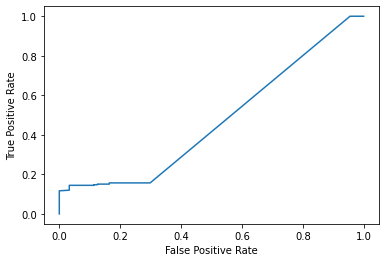

In [ ]:
y_score = text_clf_SVM.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y,text_clf_SVM.decision_function(X))
print(auc)

0.4615225000000001


### Precision and Recall

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

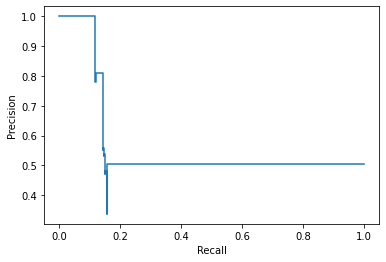

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

###Cross-validation

In [ ]:
a_ver=cross_val_score(text_clf_SVM,X,y,cv=5)
print (a_ver)
print(text_clf_SVM.score(X.values,y.values))

[0.8025 0.82   0.825  0.8225 0.8175]
0.5495


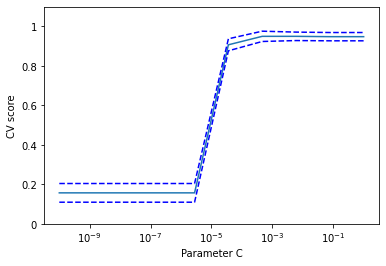

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

#X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel="linear")
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), "b--")
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), "b--")
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel("CV score")
plt.xlabel("Parameter C")
plt.ylim(0, 1.1)
plt.show()

# Save model

In [ ]:
import pickle

with open('name_classifier.pickle', 'wb') as f: #guardamos el modelo en formato pickle
    pickle.dump(text_clf_SVM, f)

In [ ]:
with open('name_classifier.pickle', "rb") as f: #asi se carga el modelo luego
    clf = pickle.load(f)

In [ ]:
name= "AUDI A3 SEDAN AMBIENTE 187878"
# name= "Financiamiento por pago fraccionado"
text_line = [normalize_text(name.upper())]
prediction = clf.predict_proba(text_line)
if prediction[0][0]>0.9:
  print(name, round(prediction[0][0], 5))

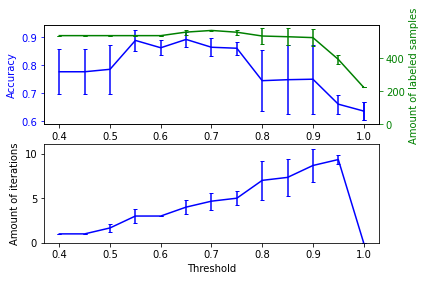

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

n_splits = 3

x_values = np.arange(0.4, 1.05, 0.05)
x_values = np.append(x_values, 0.99999)
scores = np.empty((x_values.shape[0], n_splits))
amount_labeled = np.empty((x_values.shape[0], n_splits))
amount_iterations = np.empty((x_values.shape[0], n_splits))

for i, threshold in enumerate(x_values):
    self_training_clf = SelfTrainingClassifier(base_classifier, threshold=threshold)

    # We need manual cross validation so that we don't treat -1 as a separate
    # class when computing accuracy
    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        y_test_true = y_true[test_index]

        self_training_clf.fit(X_train, y_train)

        # The amount of labeled samples that at the end of fitting
        amount_labeled[i, fold] = (
            total_samples
            - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        )
        # The last iteration the classifier labeled a sample in
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        scores[i, fold] = accuracy_score(y_test_true, y_pred)


ax1 = plt.subplot(211)
ax1.errorbar(
    x_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2, color="b"
)
ax1.set_ylabel("Accuracy", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.errorbar(
    x_values,
    amount_labeled.mean(axis=1),
    yerr=amount_labeled.std(axis=1),
    capsize=2,
    color="g",
)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Amount of labeled samples", color="g")
ax2.tick_params("y", colors="g")

ax3 = plt.subplot(212, sharex=ax1)
ax3.errorbar(
    x_values,
    amount_iterations.mean(axis=1),
    yerr=amount_iterations.std(axis=1),
    capsize=2,
    color="b",
)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("Amount of iterations")
ax3.set_xlabel("Threshold")

plt.show()